In [1]:
from sklearn.model_selection import train_test_split
from IPython.display import Image
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import kagglehub
import shutil

In [2]:
path = kagglehub.dataset_download("sujaykapadnis/watermelon-disease-recognition-dataset")

In [3]:
input_dir = Path("/kaggle/input/watermelon-disease-recognition-dataset/Watermelon Disease Recognition Dataset/Augmented Image/Augmented_Image") 
output_dir = Path("/kaggle/working/dataset")

for class_dir in input_dir.iterdir():
    if class_dir.name == "Anthracnose":
        continue
    
    images = list(class_dir.glob("*.[jJ][pP][gG]")) + list(class_dir.glob("*.[pP][nN][gG]"))
    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)
    
    for split, imgs in zip(["train", "val"], [train_imgs, val_imgs]):
        dest_dir = output_dir / split / class_dir.name
        dest_dir.mkdir(parents=True, exist_ok=True)
        
        for img in imgs:
            shutil.copy(img, dest_dir / img.name)

In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 17.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 5.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 3.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found

In [5]:
!pip install ultralytics

In [6]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
model = YOLO("yolo11m-cls")

result = model.train(
    data='/kaggle/working/dataset',
    epochs=60,
    imgsz=320, 
    patience=30,
    optimizer='AdamW',

    degrees=10,
    shear=5,
    batch=32,

    save=True,
    plots=True,
    name='watermelon_cls_model',
)

100%|██████████| 22.4M/22.4M [00:00<00:00, 28.5MB/s]


Ultralytics 8.3.109 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=classify, mode=train, model=yolo11m-cls.pt, data=/kaggle/working/dataset, epochs=60, time=None, patience=30, batch=32, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=watermelon_cls_model, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

E0000 00:00:1744839899.264050      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744839899.308987      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 17.5MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/dataset/train... 4000 images, 0 corrupt: 100%|██████████| 4000/4000 [00:01<00:00, 2020.49it/s]

train: New cache created: /kaggle/working/dataset/train.cache



val: Scanning /kaggle/working/dataset/val... 1000 images, 0 corrupt: 100%|██████████| 1000/1000 [00:00<00:00, 2116.66it/s]

val: New cache created: /kaggle/working/dataset/val.cache


optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.0005), 50 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 4 dataloader workers
Logging results to runs/classify/watermelon_cls_model
Starting training for 60 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/60         3G      1.071         32        320:   2%|▏         | 3/125 [00:07<03:45,  1.85s/it]

       1/60         3G     0.9802         32        320:   3%|▎         | 4/125 [00:08<02:31,  1.25s/it]
  0%|          | 0.00/755k [00:00<?, ?B/s]
100%|██████████| 755k/755k [00:00<00:00, 3.98MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:28<00:00,  1.80s/it]


                   all      0.931          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:25<00:00,  1.61s/it]


                   all      0.895          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:26<00:00,  1.64s/it]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:27<00:00,  1.71s/it]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:24<00:00,  1.56s/it]

                   all      0.895          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:25<00:00,  1.60s/it]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:26<00:00,  1.63s/it]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:28<00:00,  1.79s/it]


                   all      0.972          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:23<00:00,  1.49s/it]


                   all      0.983          1

      Epoch    GPU_mem       loss  Instances       Size


      10/60      3.41G     0.1065         32        320: 100%|██████████| 125/125 [03:22<00:00,  1.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:24<00:00,  1.54s/it]

                   all      0.841          1



      Epoch    GPU_mem       loss  Instances       Size


      11/60      3.41G    0.07216         32        320: 100%|██████████| 125/125 [03:20<00:00,  1.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:26<00:00,  1.67s/it]

                   all      0.877          1



      Epoch    GPU_mem       loss  Instances       Size


      12/60      3.41G    0.07219         32        320: 100%|██████████| 125/125 [03:20<00:00,  1.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:27<00:00,  1.71s/it]


                   all      0.986          1

      Epoch    GPU_mem       loss  Instances       Size


      13/60      3.41G    0.05506         32        320: 100%|██████████| 125/125 [03:25<00:00,  1.64s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:24<00:00,  1.53s/it]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


      14/60      3.41G    0.07869         32        320: 100%|██████████| 125/125 [03:23<00:00,  1.63s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:25<00:00,  1.60s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


      15/60      3.41G    0.05311         32        320: 100%|██████████| 125/125 [03:22<00:00,  1.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:26<00:00,  1.67s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


      16/60      3.41G    0.05291         32        320: 100%|██████████| 125/125 [03:20<00:00,  1.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:27<00:00,  1.73s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      17/60      3.41G    0.04646         32        320: 100%|██████████| 125/125 [03:25<00:00,  1.65s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:26<00:00,  1.65s/it]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


      18/60      3.41G    0.04208         32        320: 100%|██████████| 125/125 [03:21<00:00,  1.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:28<00:00,  1.75s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      19/60      3.41G    0.04502         32        320: 100%|██████████| 125/125 [03:20<00:00,  1.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:32<00:00,  2.00s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      20/60      3.41G    0.04597         32        320: 100%|██████████| 125/125 [03:16<00:00,  1.57s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:28<00:00,  1.81s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      21/60      3.41G    0.03225         32        320: 100%|██████████| 125/125 [03:25<00:00,  1.64s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:23<00:00,  1.50s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      22/60      3.41G    0.04073         32        320: 100%|██████████| 125/125 [03:23<00:00,  1.63s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:24<00:00,  1.52s/it]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


      23/60      3.41G    0.03691         32        320: 100%|██████████| 125/125 [03:23<00:00,  1.63s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:26<00:00,  1.67s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      24/60      3.41G    0.04127         32        320: 100%|██████████| 125/125 [03:20<00:00,  1.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:27<00:00,  1.74s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


      25/60      3.41G    0.04742         32        320: 100%|██████████| 125/125 [03:23<00:00,  1.63s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:24<00:00,  1.55s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      26/60      3.41G    0.03031         32        320: 100%|██████████| 125/125 [03:22<00:00,  1.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:27<00:00,  1.69s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      27/60      3.41G     0.0389         32        320: 100%|██████████| 125/125 [03:22<00:00,  1.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:27<00:00,  1.74s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      28/60      3.41G    0.03421         32        320: 100%|██████████| 125/125 [03:21<00:00,  1.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:27<00:00,  1.73s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      29/60      3.41G    0.03336         32        320: 100%|██████████| 125/125 [03:26<00:00,  1.66s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:24<00:00,  1.53s/it]


                   all      0.997          1

      Epoch    GPU_mem       loss  Instances       Size


      30/60      3.41G    0.02961         32        320: 100%|██████████| 125/125 [03:24<00:00,  1.63s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:25<00:00,  1.61s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


      31/60      3.41G    0.02802         32        320: 100%|██████████| 125/125 [03:23<00:00,  1.63s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:31<00:00,  1.97s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


      32/60      3.41G    0.01651         32        320: 100%|██████████| 125/125 [03:28<00:00,  1.67s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:32<00:00,  2.06s/it]


                   all      0.997          1

      Epoch    GPU_mem       loss  Instances       Size


      33/60      3.41G    0.03299         32        320: 100%|██████████| 125/125 [03:34<00:00,  1.72s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:29<00:00,  1.87s/it]


                   all      0.999          1

      Epoch    GPU_mem       loss  Instances       Size


      34/60      3.41G    0.03491         32        320: 100%|██████████| 125/125 [03:22<00:00,  1.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:30<00:00,  1.90s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      35/60      3.41G    0.02451         32        320: 100%|██████████| 125/125 [03:23<00:00,  1.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:27<00:00,  1.70s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      36/60      3.41G    0.03464         32        320: 100%|██████████| 125/125 [03:20<00:00,  1.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:30<00:00,  1.89s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      37/60      3.41G    0.01759         32        320: 100%|██████████| 125/125 [03:24<00:00,  1.64s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:27<00:00,  1.70s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      38/60      3.41G    0.01403         32        320: 100%|██████████| 125/125 [03:26<00:00,  1.65s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:30<00:00,  1.93s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


      39/60      3.41G     0.0182         32        320: 100%|██████████| 125/125 [03:24<00:00,  1.64s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:27<00:00,  1.72s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      40/60      3.41G    0.03154         32        320: 100%|██████████| 125/125 [03:26<00:00,  1.65s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:27<00:00,  1.73s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      41/60      3.41G    0.02887         32        320: 100%|██████████| 125/125 [03:32<00:00,  1.70s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:24<00:00,  1.55s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      42/60      3.41G    0.01439         32        320: 100%|██████████| 125/125 [03:29<00:00,  1.68s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:26<00:00,  1.64s/it]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


      43/60      3.41G    0.02546         32        320: 100%|██████████| 125/125 [03:31<00:00,  1.69s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:28<00:00,  1.78s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      44/60      3.41G    0.02225         32        320: 100%|██████████| 125/125 [03:28<00:00,  1.66s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:27<00:00,  1.70s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      45/60      3.41G    0.02164         32        320: 100%|██████████| 125/125 [03:31<00:00,  1.69s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:25<00:00,  1.57s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


      46/60      3.41G    0.01654         32        320: 100%|██████████| 125/125 [03:28<00:00,  1.67s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:27<00:00,  1.70s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      47/60      3.41G    0.01088         32        320: 100%|██████████| 125/125 [03:26<00:00,  1.65s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:26<00:00,  1.65s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      48/60      3.41G    0.02035         32        320: 100%|██████████| 125/125 [03:30<00:00,  1.68s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:27<00:00,  1.74s/it]

                   all          1          1


EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 18, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

48 epochs completed in 3.094 hours.
Optimizer stripped from runs/classify/watermelon_cls_model/weights/last.pt, 20.9MB
Optimizer stripped from runs/classify/watermelon_cls_model/weights/best.pt, 20.9MB

Validating runs/classify/watermelon_cls_model/weights/best.pt...
Ultralytics 8.3.109 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m-cls summary (fused): 57 layers, 10,345,475 parameters, 0 gradients, 39.3 GFLOPs
train: /kaggle/working/dataset/train... found 4000 images in 3 classes ✅ 
val: /kaggle/working/dataset/val... found 1000 images in 3 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:39<00:00,  2.48s/it]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all          1          1
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/watermelon_cls_model


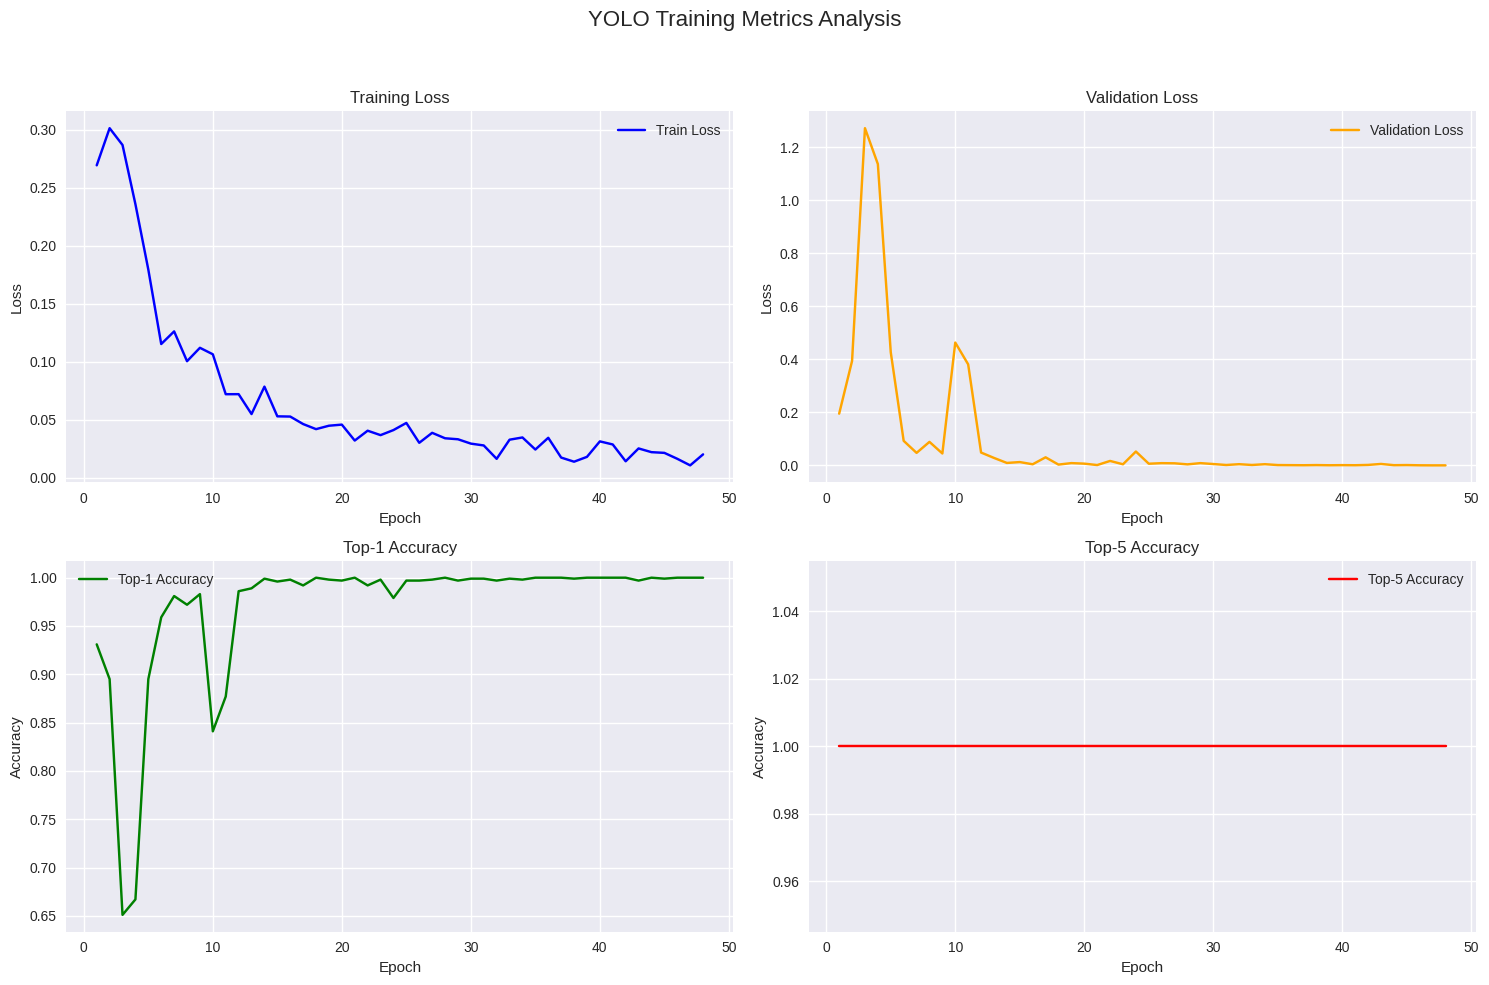

In [8]:
df = pd.read_csv('/kaggle/working/runs/classify/watermelon_cls_model/results.csv')

plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('YOLO Training Metrics Analysis', fontsize=16)

axes[0, 0].plot(df['epoch'], df['train/loss'], label='Train Loss', color='blue')
axes[0, 0].set_title('Training Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].plot(df['epoch'], df['val/loss'], label='Validation Loss', color='orange')
axes[0, 1].set_title('Validation Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

axes[1, 0].plot(df['epoch'], df['metrics/accuracy_top1'], label='Top-1 Accuracy', color='green')
axes[1, 0].set_title('Top-1 Accuracy')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True)

axes[1, 1].plot(df['epoch'], df['metrics/accuracy_top5'], label='Top-5 Accuracy', color='red')
axes[1, 1].set_title('Top-5 Accuracy')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('yolo_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

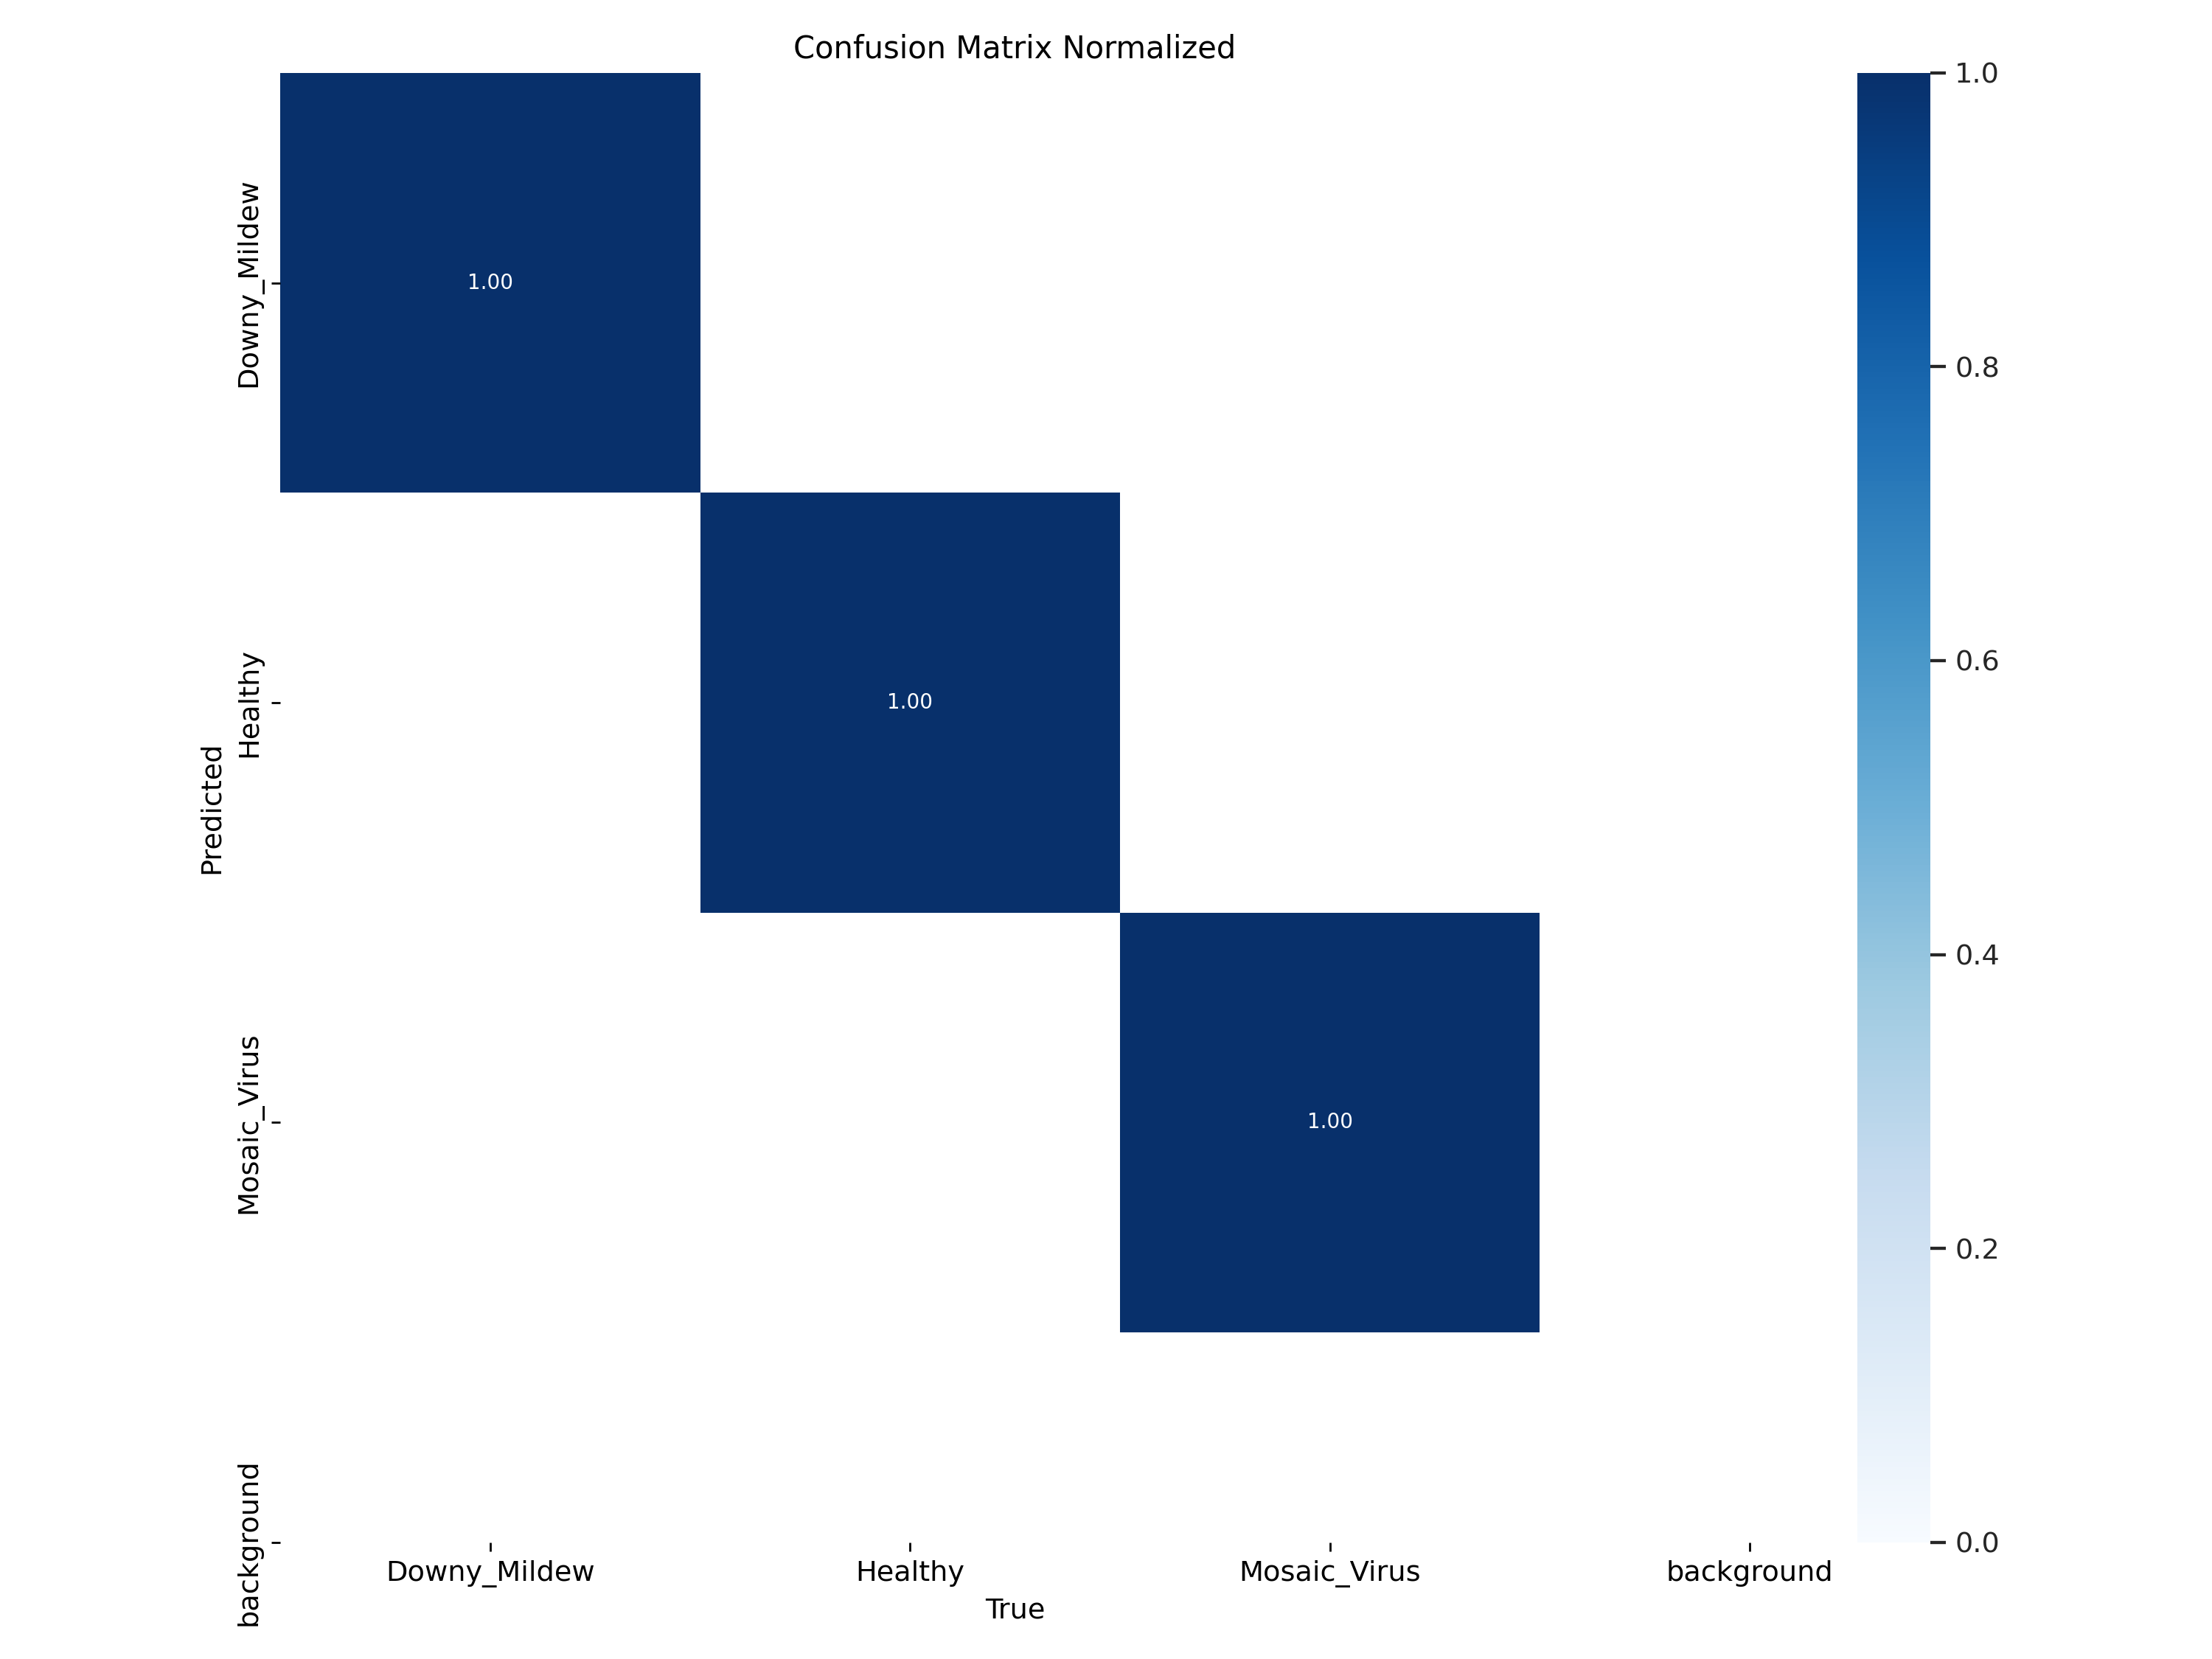

In [9]:
Image("/kaggle/working/runs/classify/watermelon_cls_model/confusion_matrix_normalized.png", width=600)